In [1]:
import numpy as np
import pandas as pd 
import plotly.express as px
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import missingno as mi
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
values = ['*','/','-','+','!','@','#','$','%','^','&','(',')','-','_','=',';',':',"'",'"','<','>','`','~',',','.',np.nan,'?']

# reading the data file

df1 = pd.read_csv(r"C:\Users\logfi\Documents\0. OS Projects\Capstone Project\laptop.csv",na_values=values) 
df1.sample(9)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
29,29,29.0,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,47738.880
348,348,348.0,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,19980.000
81,81,81.0,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core i5 1.3GHz,8GB,512GB SSD,Intel HD Graphics 615,macOS,0.92kg,80452.800
368,368,368.0,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.33kg,47898.720
317,317,317.0,Lenovo,Notebook,13.3,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45kg,24503.472
772,772,772.0,Toshiba,Notebook,14.0,IPS Panel 1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.75kg,54345.600
1133,1133,1133.0,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,40066.560
20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958,958,958.0,Dell,Ultrabook,13.3,Quad HD+ 3200x1800,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,67559.040


In [3]:
df1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [4]:
df1['Company']

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1298    Lenovo
1299    Lenovo
1300    Lenovo
1301        HP
1302      Asus
Name: Company, Length: 1303, dtype: object

In [5]:
# deleting the columns 'Unnamed: 0.1', 'Unnamed: 0' as they represent Sr.No
df1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'],inplace=True,axis=1)    

In [6]:
df1.rename(columns={"Ram": "Ram_in_GB", "Weight": "Weight_in_Kg"},inplace=True)         # renaming the columns

# removing unncessary string in the columns - GB & kg respectively

df1['Ram_in_GB'] = df1['Ram_in_GB'].str.replace('GB', '', regex= True)
df1['Weight_in_Kg'] = df1['Weight_in_Kg'].str.replace('kg', '', regex= True)

<Axes: >

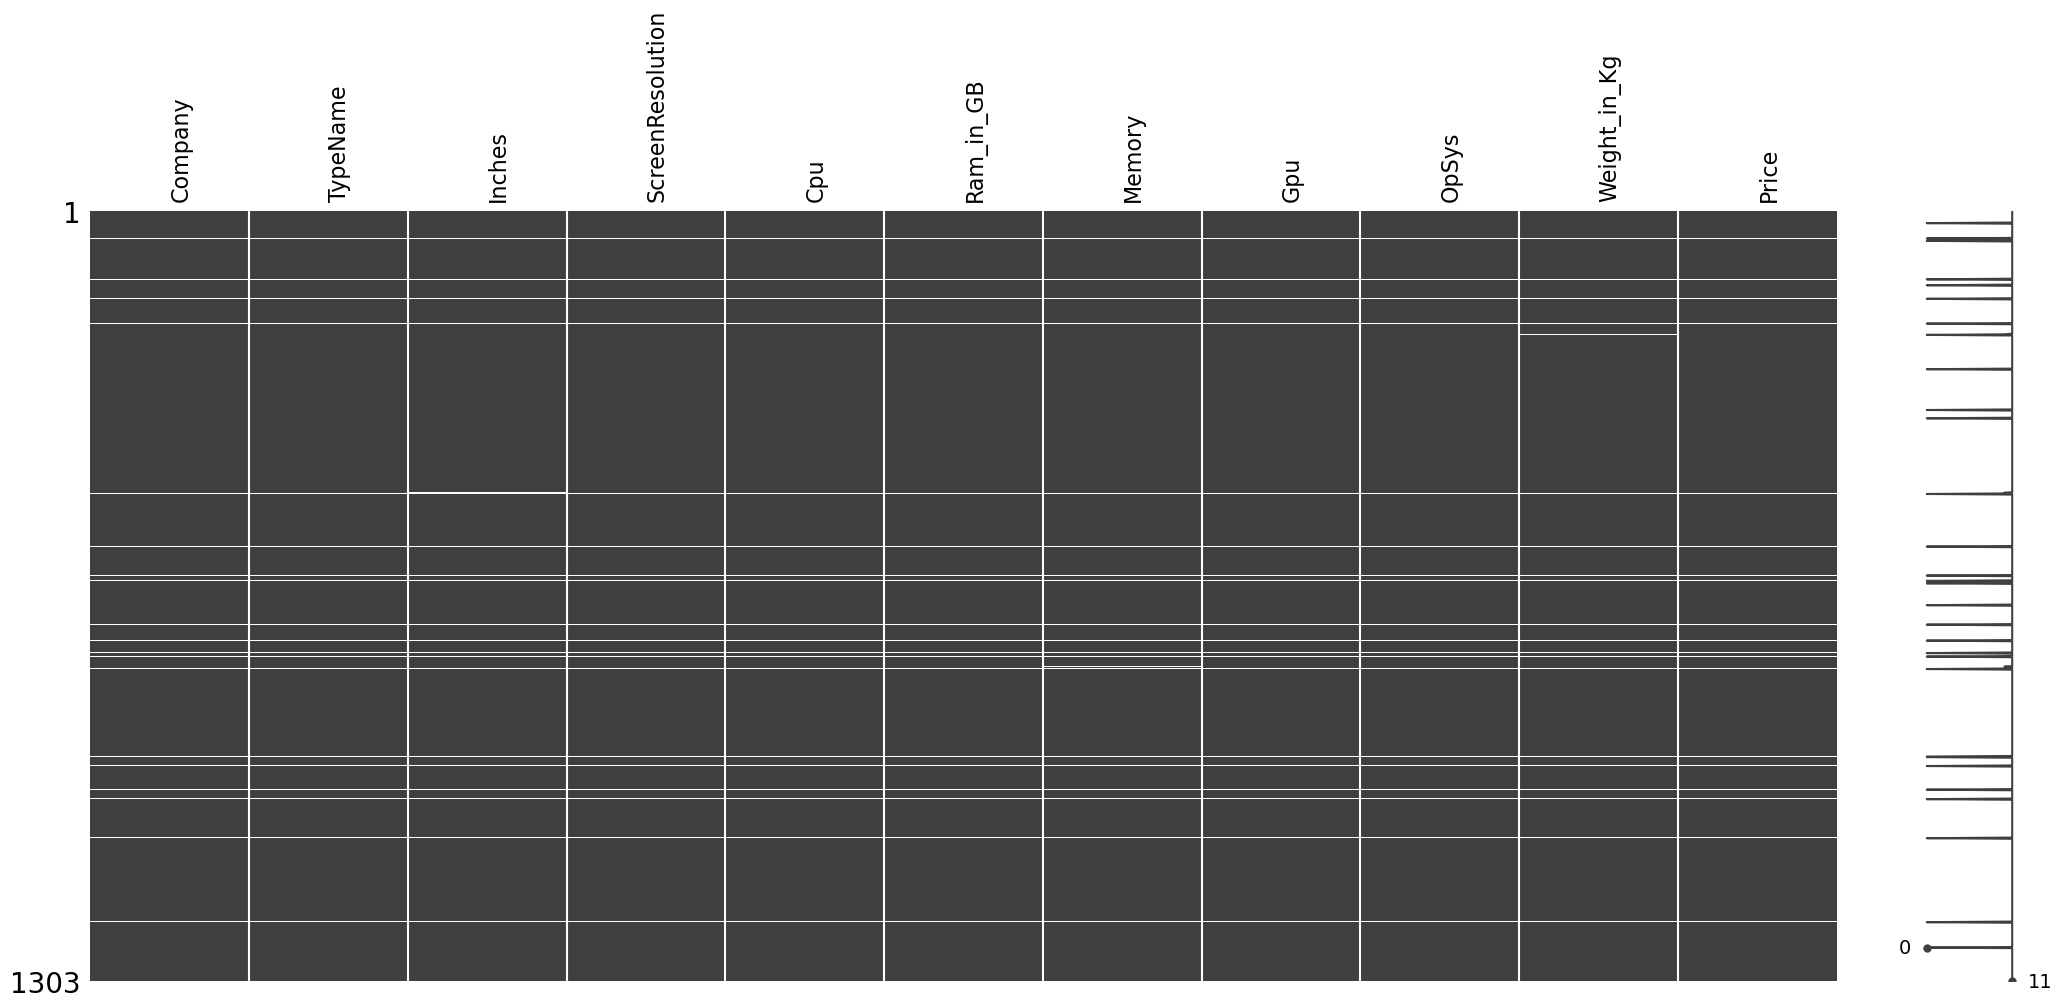

In [7]:
mi.matrix(df1,label_rotation=90)

<Axes: >

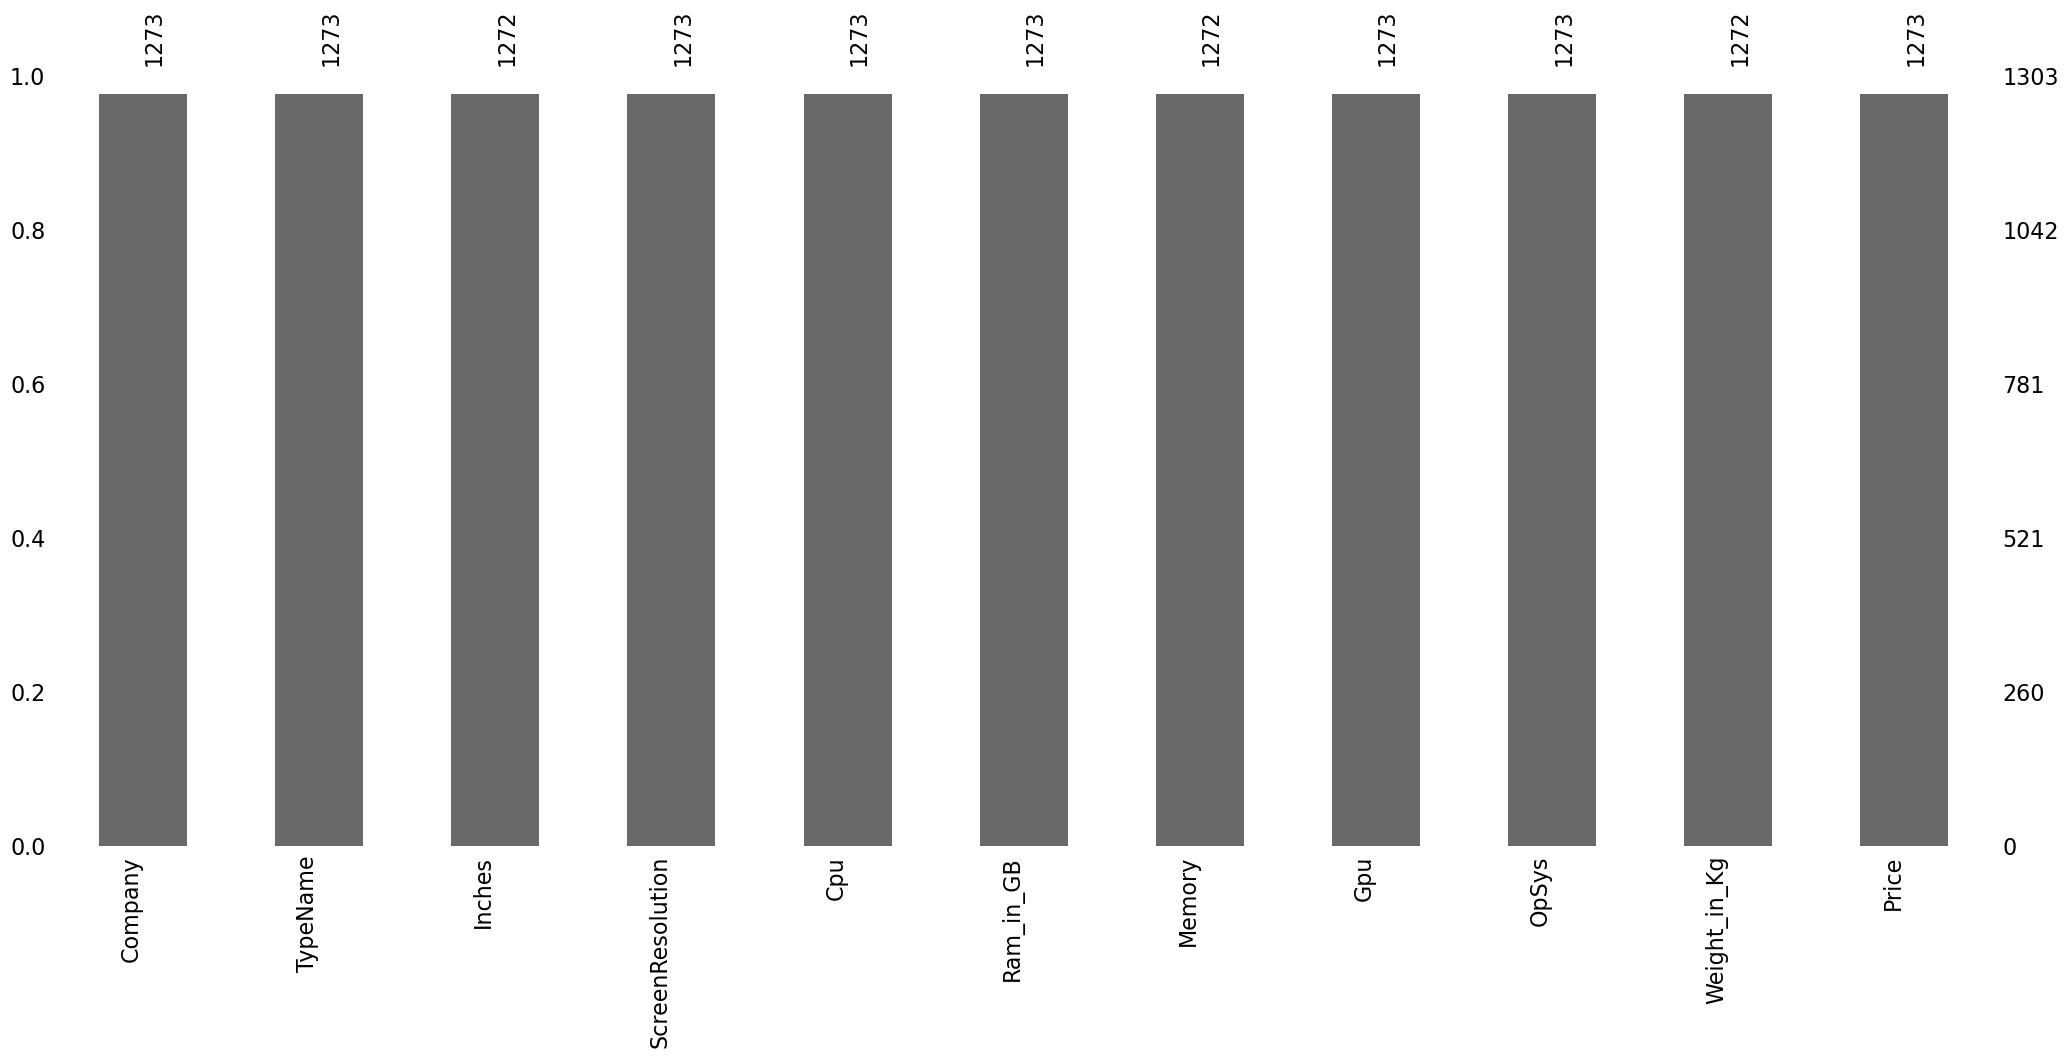

In [8]:
mi.bar(df1,label_rotation=90)

In [9]:
df1.isnull().sum()

Company             30
TypeName            30
Inches              31
ScreenResolution    30
Cpu                 30
Ram_in_GB           30
Memory              31
Gpu                 30
OpSys               30
Weight_in_Kg        31
Price               30
dtype: int64

In [ ]:
df1.dropna(axis=0,inplace=True)          #dropping null values

In [ ]:
df1.isnull().sum()

In [ ]:
mi.bar(df1,label_rotation=90)

In [ ]:
mi.matrix(df1,label_rotation=90)

In [ ]:
df1.describe(include='all')

In [ ]:
df1.info()

In [ ]:
df1.duplicated().sum()           # inspecting duplicate values

### 29 duplicate records are present in database

In [ ]:
df1.drop_duplicates(inplace = True,keep='first')          # dropping duplicates

In [ ]:
df1.duplicated().sum()           # reinspecting duplicate values

In [ ]:
df1.info()

### EDA

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.countplot(data = df1, y = df1['Company'],palette = 'Set1',order=df1['Company'].value_counts(ascending=False).index)

In [ ]:
df1['Company'].value_counts()

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.countplot(data = df1, x = df1['TypeName'],palette = 'Set1',order=df1['TypeName'].value_counts(ascending=False).index )

In [ ]:
df1['TypeName'].value_counts()

In [ ]:
df1['TypeName'].value_counts().sum()

In [ ]:
(688*100)/1241

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.countplot(data = df1, x = df1['Ram_in_GB'],palette = 'Set1',order=df1['Ram_in_GB'].value_counts(ascending=False).index )

In [ ]:
df1['Ram_in_GB'].value_counts()

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))
ax = sns.countplot(data = df1, x = df1['OpSys'],palette = 'Set1',order=df1['OpSys'].value_counts(ascending=False).index)

In [ ]:
df1['OpSys'].value_counts()

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))
ax = sns.countplot(data = df1, x = df1['OpSys'],palette = 'Set1',order=df1['OpSys'].value_counts(ascending=False).index, hue='Ram_in_GB' )

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 24))
ax = sns.countplot(data = df1, y = df1['Cpu'],palette = 'Set1',order=df1['Cpu'].value_counts(ascending=False).index)

In [ ]:
df1['Processor'] = df1['Cpu'].apply(lambda x: 'Intel' if 'Intel' in x else ('AMD' if 'AMD' in x else 'Samsung'))

In [ ]:
df1['Processor'].value_counts()

In [ ]:
df1['Processor'].value_counts().sum()

In [ ]:
(1180*100)/1241

In [ ]:
df1['Processor'].value_counts().plot(kind='bar')

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 24))
ax = sns.countplot(data = df1, y = df1['Memory'],palette = 'Set1',order=df1['Memory'].value_counts(ascending=False).index)

In [ ]:
# Convert 'Memory' to string and remove '.0'
df1['Memory'] = df1['Memory'].astype(str).replace('\.0', '', regex=True)

# Remove 'GB' and replace 'TB' with '000'
df1["Memory"] = df1["Memory"].str.replace('GB', '').str.replace('TB', '000')

# Split 'Memory' into two parts based on '+'
new = df1["Memory"].str.split("+", n=1, expand=True)

# Assign the split parts to 'first' and 'second'
df1["first"] = new[0].str.strip()
df1["second"] = new[1]

# Create binary columns for the presence of different storage types in 'first'
df1["Layer1HDD"] = df1["first"].str.contains("HDD").astype(int)
df1["Layer1SSD"] = df1["first"].str.contains("SSD").astype(int)
df1["Layer1Hybrid"] = df1["first"].str.contains("Hybrid").astype(int)
df1["Layer1Flash_Storage"] = df1["first"].str.contains("Flash Storage").astype(int)

# Remove non-numeric characters from 'first'
df1['first'] = df1['first'].str.replace(r'\D', '', regex=True)

# Fill NaN values in 'second' with "0"
df1["second"].fillna("0", inplace=True)

# Create binary columns for the presence of different storage types in 'second'
df1["Layer2HDD"] = df1["second"].str.contains("HDD").astype(int)
df1["Layer2SSD"] = df1["second"].str.contains("SSD").astype(int)
df1["Layer2Hybrid"] = df1["second"].str.contains("Hybrid").astype(int)
df1["Layer2Flash_Storage"] = df1["second"].str.contains("Flash Storage").astype(int)

# Remove non-numeric characters from 'second'
df1['second'] = df1['second'].str.replace(r'\D', '', regex=True)

# Convert 'first' and 'second' to integers
df1["first"] = df1["first"].astype(int)
df1["second"] = df1["second"].astype(int)

# Calculate total storage for each type
df1["HDD"] = (df1["first"] * df1["Layer1HDD"]) + (df1["second"] * df1["Layer2HDD"])
df1["SSD"] = (df1["first"] * df1["Layer1SSD"]) + (df1["second"] * df1["Layer2SSD"])
df1["Hybrid"] = (df1["first"] * df1["Layer1Hybrid"]) + (df1["second"] * df1["Layer2Hybrid"])
df1["Flash_Storage"] = (df1["first"] * df1["Layer1Flash_Storage"]) + (df1["second"] * df1["Layer2Flash_Storage"])

# Drop the intermediate columns
df1.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [ ]:
df1["HDD"].value_counts()

In [ ]:
df1["SSD"].value_counts()

In [ ]:
df1["HDD"].value_counts()

In [ ]:
df1['Hybrid'].value_counts()

In [ ]:
df1['Flash_Storage'].value_counts()

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 24))
ax = sns.countplot(data = df1, y = df1['Gpu'],palette = 'Set1',order=df1['Gpu'].value_counts(ascending=False).index)

In [ ]:
df1['Graphics'] = df1['Gpu'].apply(lambda x: 'Intel' if 'Intel' in x else ('AMD' if 'AMD' in x else 'Nvidia'))

In [ ]:
df1['Graphics'].value_counts()

In [ ]:
(683*100)/(683+389+169)

In [ ]:
df1['Graphics'].value_counts().plot(kind='bar')

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 24))
ax = sns.countplot(data = df1, y = df1['ScreenResolution'],palette = 'Set1',order=df1['ScreenResolution'].value_counts(ascending=False).index)

In [ ]:
 df1['ScreenResolution'].value_counts()

In [ ]:
df1['Touchscreen'] = df1['ScreenResolution'].apply(lambda x:'Yes' if 'Touchscreen' in x else 'No')

In [ ]:
df1['Touchscreen'].value_counts()

In [ ]:
(1060/(1060+181))*100

In [ ]:
df1['Touchscreen'].value_counts().plot(kind='bar')

In [ ]:
df1['Touchscreen'].value_counts()

### Insights from given dataset, commonly sold laptop specifications
- Lenovo is the most widely sold brand of laptop, which is followed by Dell
- 55% of laptops are Notebook
- 8 GB ram is the widely used configuration
- Windows 10 is the widely used operating system 
- Full HD 1920 * 1080 is the widely used screen resolution
- 256 GB SSD is the widely used memory
- Intel HD Graphics 620 is widely used Gpu
- Intel core i5 7200U 2.5 GHz is widely used Cpu
- 85% laptops sold were of non-touch type [touchscreen]
- 55% of graphics card (Gpu) are of intel
- 95% of processors (Cpu) are of intel

In [ ]:
df1.sample(7)

In [ ]:
df1.columns

### Preprocessing

In [ ]:
df1['Inches'] = pd.to_numeric(df1['Inches'])
df1['Ram_in_GB'] = pd.to_numeric(df1['Ram_in_GB'])
df1['Weight_in_Kg'] = pd.to_numeric(df1['Weight_in_Kg'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Company'] = le.fit_transform(df1['Company'])
df1['TypeName'] = le.fit_transform(df1['TypeName'])
df1['ScreenResolution'] = le.fit_transform(df1['ScreenResolution'])
df1['Cpu'] = le.fit_transform(df1['Cpu'])
df1['Memory'] = le.fit_transform(df1['Memory'])
df1['Gpu'] = le.fit_transform(df1['Gpu'])
df1['OpSys'] = le.fit_transform(df1['OpSys'])
df1['Touchscreen'] = le.fit_transform(df1['Touchscreen'])
df1['Processor'] = le.fit_transform(df1['Processor'])
df1['Graphics'] = le.fit_transform(df1['Graphics'])
df1['HDD'] = le.fit_transform(df1['HDD'])
df1['SSD'] = le.fit_transform(df1['SSD'])
df1['Hybrid'] = le.fit_transform(df1['Hybrid'])
df1['Flash_Storage'] = le.fit_transform(df1['Flash_Storage'])
df1['Ram_in_GB'] = le.fit_transform(df1['Ram_in_GB'])

In [ ]:
df1.sample(5)

In [ ]:
df1['Inches'].min()

In [ ]:
df1['Inches'].max()

In [ ]:
df1['Weight_in_Kg'].max()

In [ ]:
df1['Weight_in_Kg'].min()

In [ ]:
df1['Weight_in_Kg'].mean()

In [ ]:
df1.loc[df1['Weight_in_Kg'] == 0.0002,'Weight_in_Kg'] = df1['Weight_in_Kg'].mean()   # Replacing with mean

In [ ]:
df1['Weight_in_Kg'].min()

In [ ]:
df1["Company"].value_counts()

In [ ]:
df1["TypeName"].value_counts()

In [ ]:
df1["ScreenResolution"].value_counts()

In [ ]:
df1["Ram_in_GB"].value_counts()

In [ ]:
df1["HDD"].value_counts()

In [ ]:
df1["SSD"].value_counts()

In [ ]:
df1["Hybrid"].value_counts()

In [ ]:
df1["Flash_Storage"].value_counts()

In [ ]:
df1["Touchscreen"].value_counts()

In [ ]:
#df1["SSD"].value_counts()

In [ ]:
df1.corr()

In [ ]:
fig = df1.hist(xlabelsize=10, ylabelsize=10,grid = False,legend=False,figsize=(10,10))
[x.title.set_size(10) for x in fig.ravel()]
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df1[['Inches','Ram_in_GB','Weight_in_Kg']] = pt.fit_transform(df1[['Inches','Ram_in_GB','Weight_in_Kg']])  
# removed price from here initially it was available during model building

In [ ]:
fig = df1.hist(xlabelsize=10, ylabelsize=10,grid = False,legend=False,figsize=(10,10))
[x.title.set_size(10) for x in fig.ravel()]
plt.show()

# Multicollinearity check

In [ ]:
# Taking required independent variables
df2 = df1[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram_in_GB',
       'Gpu', 'OpSys', 'Weight_in_Kg', 'Processor', 'HDD',
       'SSD', 'Hybrid', 'Flash_Storage', 'Graphics', 'Touchscreen']] 
# removed price here

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df2
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data.sort_values(by='VIF')

In [ ]:
# Taking columns below 5 VIF
df3 = df2[['Company', 'Inches', 'ScreenResolution','Ram_in_GB',
       'Weight_in_Kg', 'HDD','Hybrid', 'Flash_Storage', 'Touchscreen','TypeName','SSD']] 
df3

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df3.corr()

# Create a heatmap of the entire correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Set1', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Filter features with correlations above 0.3 (positive or negative)
high_corr_features = corr_matrix[(corr_matrix > 0.3) | (corr_matrix < -0.3)]
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_features, annot=True, cmap='Set1', fmt=".2f")
plt.title("High Correlation Features (>|0.3|)")
plt.show()


# Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
x = df3[['Company', 'Inches', 'ScreenResolution','Ram_in_GB',
       'Weight_in_Kg', 'HDD','Hybrid', 'Flash_Storage', 'Touchscreen','TypeName','SSD']]

y = df1['Price']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=77,shuffle=True)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier

# Variance Thresholding

In [ ]:
selector = VarianceThreshold(threshold=0.2)
X_filtered = selector.fit_transform(x)

# Plot variances before and after filtering
plt.bar(range(x.shape[1]), np.var(x, axis=0), color='blue', label='Original')
plt.bar(range(X_filtered.shape[1]), np.var(X_filtered, axis=0), color='red', label='Filtered')
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.title('Variance of Features before and after Filtering')
plt.legend()
# Save the plot
plt.savefig('Variance Threshold.png')
plt.show()

#  L1 Regularization (Lasso)

In [ ]:
# Initialize LassoCV
lasso = LassoCV(cv=5)
lasso.fit(x, y)

# Plot feature coefficients
plt.figure(figsize=(10, 5))
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients with Lasso Regression')
# Save the plot
plt.savefig('Lasso Regression.png')
plt.show()


# RAM is the most important feature

In [ ]:
from sklearn.model_selection import train_test_split
x = df3[['Company','Inches','ScreenResolution','Ram_in_GB',
       'Weight_in_Kg', 'HDD','Hybrid', 'Flash_Storage', 'Touchscreen','TypeName','SSD']]

y = df1['Price']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=77,shuffle=True)

# ML models

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred_lr = lr.predict(xtest)

from sklearn.metrics import root_mean_squared_error, r2_score
r2_score = r2_score(ytest,ypred_lr)
root_mean_squared_error = root_mean_squared_error(ytest,ypred_lr)
print('r2_score :', r2_score)
print('RMSE :',root_mean_squared_error)
print('Coefficient :',lr.coef_)
print('Intercept :',lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(xtrain, ytrain)))
print("Test set score: {:.2f}".format(lr.score(xtest, ytest)))

fig = px.scatter(x=ytest, y=ypred_lr, color_discrete_sequence=['purple'])

fig.update_layout( title='Scatter Plot of Predicted vs. Test Values',width=800,height=600, xaxis_showgrid=False,
    yaxis_showgrid=False,  xaxis_title='Test Values',  yaxis_title='Predicted Values',
                      font=dict(family="Courier New, monospace",size=18,color="RebeccaPurple"))

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(xtrain,ytrain)
ypred_rd = rd.predict(xtest)

from sklearn.metrics import root_mean_squared_error, r2_score
r2_score = r2_score(ytest,ypred_rd)
root_mean_squared_error = root_mean_squared_error(ytest,ypred_rd)
print('r2_score :', r2_score)
print('RMSE :',root_mean_squared_error)
print('Coefficient :',rd.coef_)
print('Intercept :',rd.intercept_)
print("Training set score: {:.2f}".format(rd.score(xtrain, ytrain)))
print("Test set score: {:.2f}".format(rd.score(xtest, ytest)))

fig = px.scatter(x=ytest, y=ypred_rd, color_discrete_sequence=['purple'])

fig.update_layout( title='Scatter Plot of Predicted vs. Test Values',width=800,height=600, xaxis_showgrid=False,
    yaxis_showgrid=False,  xaxis_title='Test Values',  yaxis_title='Predicted Values',
                      font=dict(family="Courier New, monospace",size=18,color="RebeccaPurple"))

# Lasso 

In [ ]:
from sklearn.linear_model import Ridge
l = Lasso()
l.fit(xtrain,ytrain)
ypred_l = l.predict(xtest)

from sklearn.metrics import root_mean_squared_error, r2_score
r2_score = r2_score(ytest,ypred_l)
root_mean_squared_error = root_mean_squared_error(ytest,ypred_l)
print('r2_score :', r2_score)
print('RMSE :',root_mean_squared_error)
print('Coefficient :',l.coef_)
print('Intercept :',l.intercept_)
print("Training set score: {:.2f}".format(l.score(xtrain, ytrain)))
print("Test set score: {:.2f}".format(l.score(xtest, ytest)))

fig = px.scatter(x=ytest, y=ypred_l, color_discrete_sequence=['purple'])

fig.update_layout( title='Scatter Plot of Predicted vs. Test Values',width=800,height=600, xaxis_showgrid=False,
    yaxis_showgrid=False,  xaxis_title='Test Values',  yaxis_title='Predicted Values',
                      font=dict(family="Courier New, monospace",size=18,color="RebeccaPurple"))

import pickle
filename='laptop_pred_l.pkl'
pickle.dump(l, open(filename, 'wb'))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=42)
rfr.fit(xtrain, ytrain)
ypred_rfr = rfr.predict(xtest)
    
# Calculate and store the R2-score and RMSE
r2_score = r2_score(ytest, ypred_rfr)
root_mean_squared_error = np.sqrt(mean_squared_error(ytest, ypred_rfr))
print('r2_score :', r2_score)
print('RMSE :',root_mean_squared_error)
print("Training set score: {:.2f}".format(rfr.score(xtrain, ytrain)))
print("Test set score: {:.2f}".format(rfr.score(xtest, ytest)))

fig = px.scatter(x=ytest, y=ypred_rfr, color_discrete_sequence=['purple'])

fig.update_layout( title='Scatter Plot of Predicted vs. Test Values',width=800,height=600, xaxis_showgrid=False,
    yaxis_showgrid=False,  xaxis_title='Test Values',  yaxis_title='Predicted Values',
                      font=dict(family="Courier New, monospace",size=18,color="RebeccaPurple"))

import pickle
filename='laptop_pred_rfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))

# XG Boost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = XGBRegressor(n_estimators=20, max_depth=10, random_state=42,enable_categorical=False)
xgb_model.fit(xtrain, ytrain)
ypred_xgb = xgb_model.predict(xtest)
    
# Calculate and store the R2-score and RMSE
r2_score = r2_score(ytest, ypred_xgb)
root_mean_squared_error = np.sqrt(mean_squared_error(ytest, ypred_xgb))
print('r2_score :', r2_score)
print('RMSE :',root_mean_squared_error)
print("Training set score: {:.2f}".format(xgb_model.score(xtrain, ytrain)))
print("Test set score: {:.2f}".format(xgb_model.score(xtest, ytest)))

fig = px.scatter(x=ytest, y=ypred_xgb, color_discrete_sequence=['purple'])

fig.update_layout( title='Scatter Plot of Predicted vs. Test Values',width=800,height=600, xaxis_showgrid=False,
    yaxis_showgrid=False,  xaxis_title='Test Values',  yaxis_title='Predicted Values',
                      font=dict(family="Courier New, monospace",size=18,color="RebeccaPurple"))



# Hyper Parmeter Tuning - Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,40,60,80, 90, 100, 110],
    'max_features': [1,2, 3],
    'min_samples_leaf': [1,3, 4, 5],
    'min_samples_split': [1,2,4,8, 10, 12],
    'n_estimators': [20,50,100, 200, 300,500,600]
}

# Creating the base model
rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)

In [ ]:
# Fit the grid search to the data
grid_search.fit(xtrain, ytrain);

In [ ]:
grid_search.best_params_

# Final Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#rfr = RandomForestRegressor(n_estimators = 300, max_depth=40, random_state=42, bootstrap = True, max_features = 1,
# min_samples_leaf = 1, min_samples_split = 2)

rfr = RandomForestRegressor(n_estimators = 100, max_depth=40, random_state=42, bootstrap = True, max_features = 1,
 min_samples_leaf = 1, min_samples_split = 2)

rfr.fit(xtrain, ytrain)
ypred_rfr = rfr.predict(xtest)
    
# Calculate and store the R2-score and RMSE
r2_score = r2_score(ytest, ypred_rfr)
root_mean_squared_error = np.sqrt(mean_squared_error(ytest, ypred_rfr))
print('r2_score :', r2_score)
print('RMSE :',root_mean_squared_error)

fig = px.scatter(x=ytest, y=ypred_rfr, color_discrete_sequence=['purple'])

fig.update_layout( title='Scatter Plot of Predicted vs. Test Values',width=800,height=600, xaxis_showgrid=False,
    yaxis_showgrid=False,  xaxis_title='Test Values',  yaxis_title='Predicted Values',
                      font=dict(family="Courier New, monospace",size=18,color="RebeccaPurple"))

In [ ]:
import pickle
filename='laptop_pred_rfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))

In [ ]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder


data = {'Company': ['Apple'], 'Inches': [13.3],'ScreenResolution': ['IPS Panel Retina Display 2880x1800'], 
            'Ram_in_GB': [16], 'Weight_in_Kg': [1.83], 'HDD': [0], 
            'Hybrid': [0],'Flash_Storage': [0], 'Touchscreen': ['No'],'TypeName': ['Ultrabook'],'SSD': [256]}

col = ['Company', 'Inches','ScreenResolution', 'Ram_in_GB', 'Weight_in_Kg',
       'HDD', 'Hybrid','Flash_Storage', 'Touchscreen','TypeName','SSD']

df8 = pd.DataFrame(data,columns=col)

df8['Company'] = le.fit_transform(df8['Company'])
df8['ScreenResolution'] = le.fit_transform(df8['ScreenResolution'])
df8['HDD'] = le.fit_transform(df8['HDD'])
df8['Hybrid'] = le.fit_transform(df8['Hybrid'])
df8['Flash_Storage'] = le.fit_transform(df8['Flash_Storage'])
df8['Touchscreen'] = le.fit_transform(df8['Touchscreen'])
df8['SSD'] = le.fit_transform(df8['SSD'])
df8['TypeName'] = le.fit_transform(df8['TypeName'])

predicted_price = xgb_model1.predict(df8)

print('Predicted_price:', predicted_price)